## Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Customer Data.csv')

### EDA

In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe().transpose()

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [6]:
df.shape

(8950, 18)

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [9]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop('CUST_ID',axis = 1,inplace = True)

In [12]:
df.shape

(8950, 17)

In [13]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [14]:
plt.figure(figsize = (30,45),dpi = 250)
for i, col in enumerate(df.columns):
    ax = plt.subplot(9,2,i+1)
    sns.kdeplot(df[col],ax = ax,fill = True)
    plt.xlabel(col)

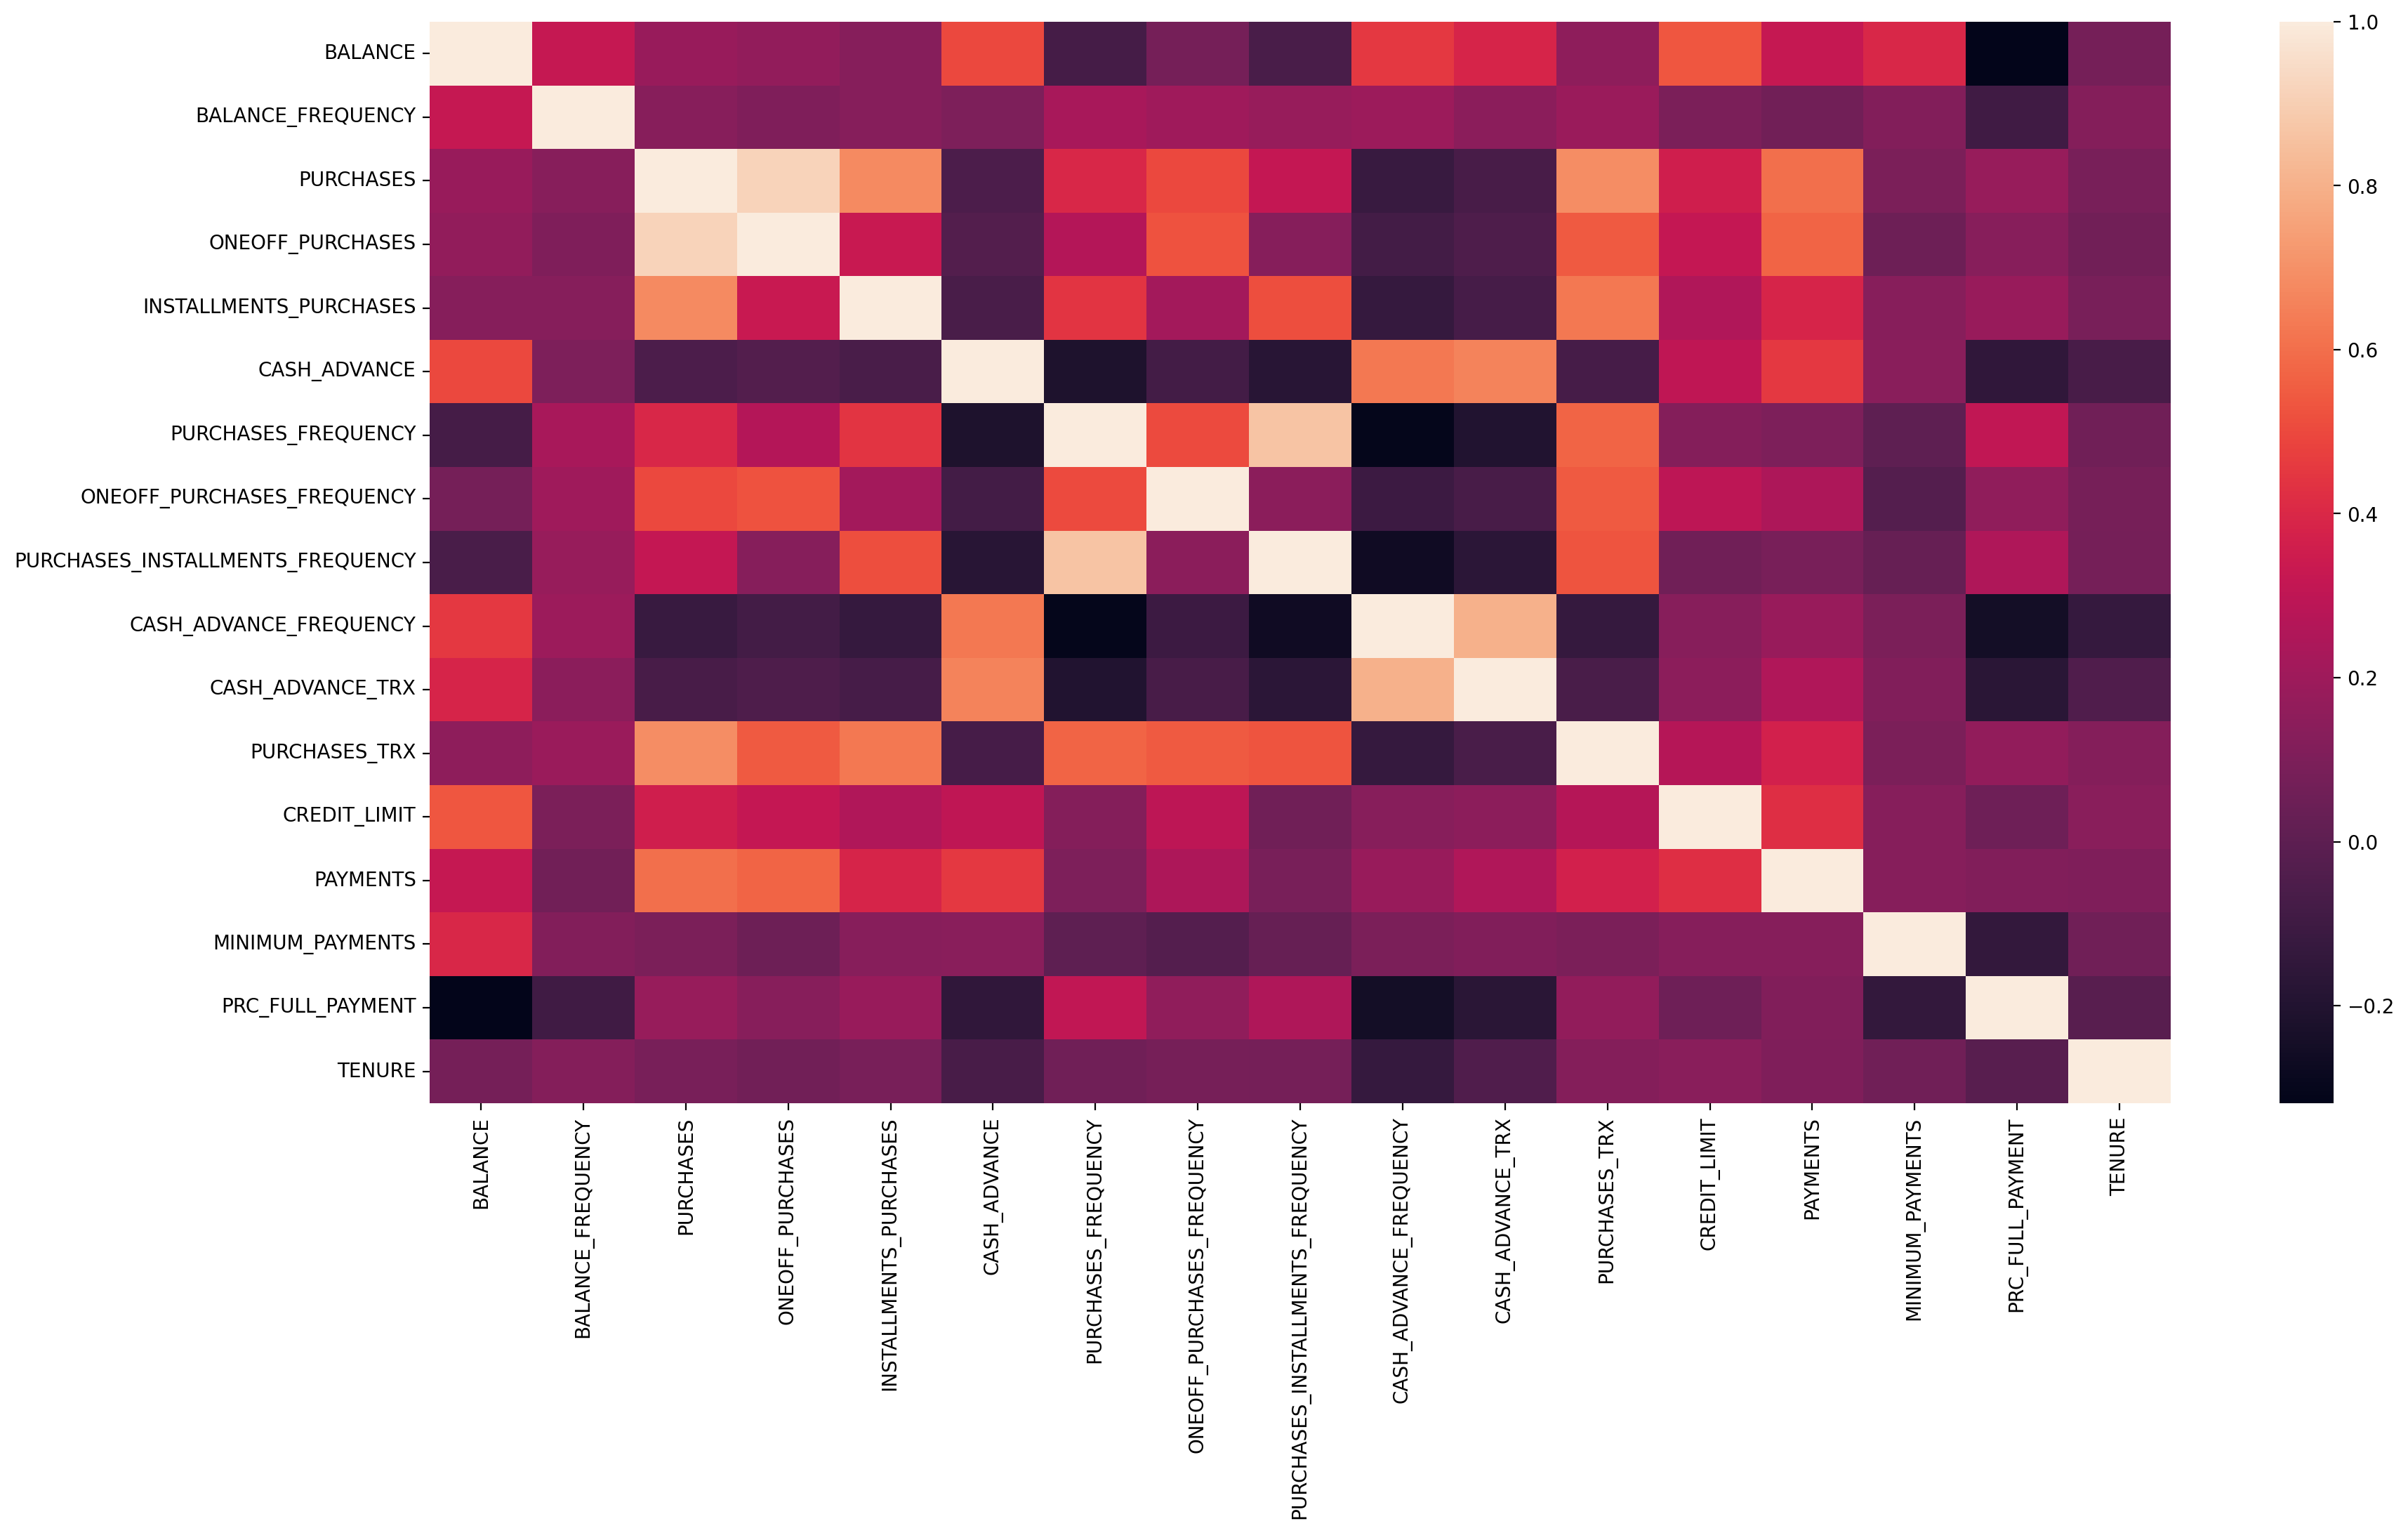

In [15]:
plt.figure(figsize= (20,10),dpi = 200)
sns.heatmap(df.corr())
plt.show()

### Scaling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_df = scaler.fit_transform(df)

### Dimensionality Reduction

In [19]:
from sklearn.decomposition import PCA

In [20]:
variance_ratio = []

for i in range(1,18):
    pca = PCA(n_components=i)
    pca.fit(scaled_df)
    variance_ratio.append(np.sum(pca.explained_variance_ratio_))

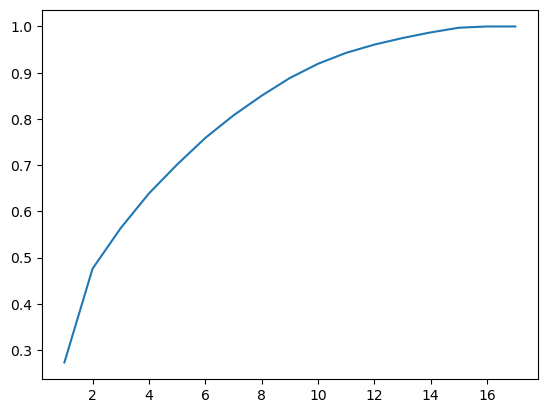

In [21]:
plt.plot(range(1,18),variance_ratio)

In [41]:
pca_2 = PCA(n_components=3)
principle_components = pca_2.fit_transform(scaled_df)

In [42]:
pca_df = pd.DataFrame(principle_components,columns = ['PCA_1','PCA_2','PCA_3'])

In [43]:
np.sum(pca_2.explained_variance_ratio_)

0.5638400748691775

In [47]:
pca_df

PCA_1     PCA_2     PCA_3
0    -1.682221 -1.076445  0.488622
1    -1.138293  2.506482  0.600885
2     0.969684 -0.383517  0.102489
3    -0.873627  0.043172  1.460117
4    -1.599435 -0.688576  0.365304
...        ...       ...       ...
8945 -0.359631 -2.016140 -0.995010
8946 -0.564370 -1.639118 -1.289979
8947 -0.926205 -1.810781 -0.474390
8948 -2.336552 -0.657967  0.974881
8949 -0.556421 -0.400482  1.014836

[8950 rows x 3 columns]

### K Means Clustering

In [26]:
from sklearn.cluster import KMeans

In [27]:
inert = []
for i in range(1,20):
    k_mean = KMeans(n_clusters=i)
    k_mean.fit(scaled_df)
    inert.append(k_mean.inertia_)

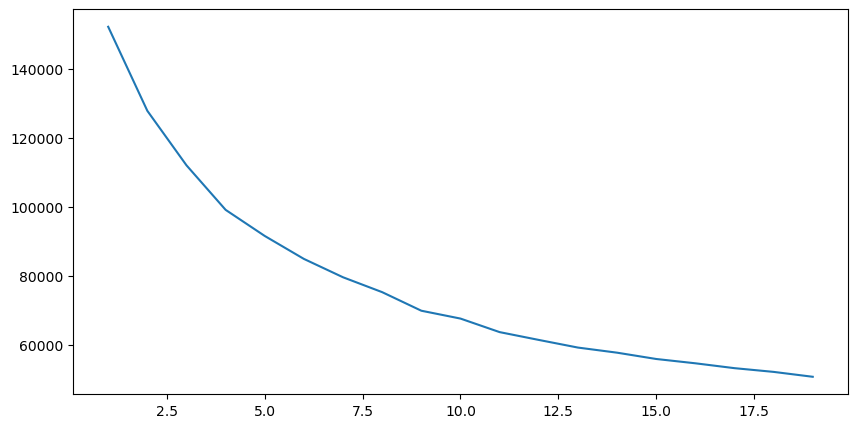

In [28]:
plt.figure(figsize=(10,5))
plt.plot(range(1,20),inert)
##plt.xlim(1,10)


In [48]:
kmeans = KMeans(n_clusters=8)
kmeans.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans.labels_})],axis=1)

In [49]:
pca_df_kmeans

PCA_1     PCA_2     PCA_3  cluster
0    -1.682221 -1.076445  0.488622        0
1    -1.138293  2.506482  0.600885        5
2     0.969684 -0.383517  0.102489        7
3    -0.873627  0.043172  1.460117        0
4    -1.599435 -0.688576  0.365304        0
...        ...       ...       ...      ...
8945 -0.359631 -2.016140 -0.995010        2
8946 -0.564370 -1.639118 -1.289979        2
8947 -0.926205 -1.810781 -0.474390        2
8948 -2.336552 -0.657967  0.974881        0
8949 -0.556421 -0.400482  1.014836        0

[8950 rows x 4 columns]

In [39]:
import plotly.express as px

In [50]:
figure = px.scatter_3d(pca_df_kmeans,
                    color='cluster',
                    x="PCA_1",
                    y="PCA_2",
                    z="PCA_3",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4","5","6","7"]}
                    )
figure.update_layout()
figure.show()


In [56]:
cluster_center =  pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])

In [57]:
cluster_center = scaler.inverse_transform(cluster_center)

In [60]:
cluster_center =  pd.DataFrame(data=cluster_center,columns=[df.columns])

In [61]:
cluster_center

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  1532.093832          0.965031    237.082798       191.886997   
1  5405.330935          0.957955  27276.363750     21877.102917   
2   732.692678          0.949788    873.906796       168.149764   
3  3874.347938          0.988216    738.477778       101.711296   
4   110.872764          0.371056    323.498895       199.475471   
5  4835.050834          0.965038    519.953671       329.212605   
6  3686.064602          0.987173   6399.072701      3639.973678   
7  1328.559710          0.971089   2134.651689      1673.321481   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              45.365281   809.373720            0.143895   
1            5399.260833  1550.378389            0.909028   
2             706.309477   222.692793            0.884474   
3             636.766481   906.404863            0.451740   
4             124.252790   335.064113            0.263147   
5             190.848312  5084.259078            0.297021   
6            2760.823161   650.269592            0.959148   
7             461.330208   291.688380            0.878469   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.084817                         0.059616   
1                   0.842361                         0.720833   
2                   0.080550                         0.831517   
3                   0.036055                         0.420455   
4                   0.073014                         0.181040   
5                   0.140929                         0.192942   
6                   0.677142                         0.870738   
7                   0.752457                         0.442065   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.162950         3.081507      2.608904   3254.868721   
1               0.059028         2.500000    127.958333  16083.333333   
2               0.043144         0.816204     18.138426   3337.402030   
3               0.106481         2.981481     15.648148   4111.111111   
4               0.037966         0.787481      4.064142   3722.012283   
5               0.519235        15.937764      7.808017   7975.795934   
6               0.078757         2.238506     92.977011   9269.540230   
7               0.053741         0.988353     29.886023   6074.192255   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0    961.172455       692.431242         0.020990  11.508562  
1  27925.634496      3266.671038         0.511206  11.916667  
2   1033.926363       582.375171         0.259574  11.476852  
3   1386.179670     23026.762059         0.001543  11.907407  
4   1087.390485       269.082435         0.228241  11.297527  
5   3894.223061      1665.274570         0.039546  11.378692  
6   5969.604295      1719.914978         0.231911  11.968391  
7   2121.826114       505.466162         0.272782  11.801165

In [62]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans.labels_})],axis=1)
cluster_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        5  
2      622.066742        627.284787          0.000000      12        7  
3        0.000000        864.206542          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        2  
89

<Axes: xlabel='Cluster', ylabel='count'>

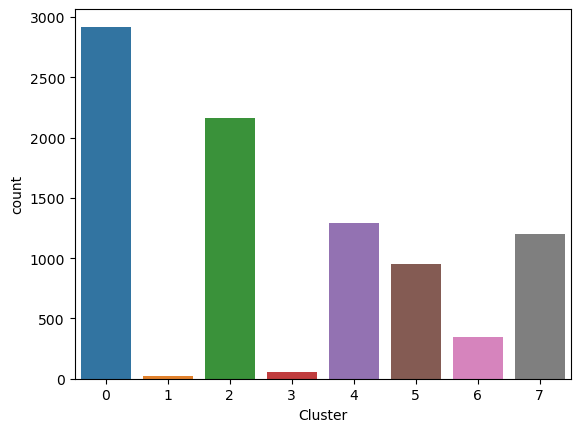

In [63]:
sns.countplot(x= 'Cluster',data = cluster_df)

In [65]:
cluster_0 = cluster_df[cluster_df['Cluster']==0]
cluster_1 = cluster_df[cluster_df['Cluster']==1]
cluster_2 = cluster_df[cluster_df['Cluster']==2]
cluster_3 = cluster_df[cluster_df['Cluster']==3]
cluster_4 = cluster_df[cluster_df['Cluster']==4]
cluster_5 = cluster_df[cluster_df['Cluster']==5]
cluster_6 = cluster_df[cluster_df['Cluster']==6]
cluster_7 = cluster_df[cluster_df['Cluster']==7]

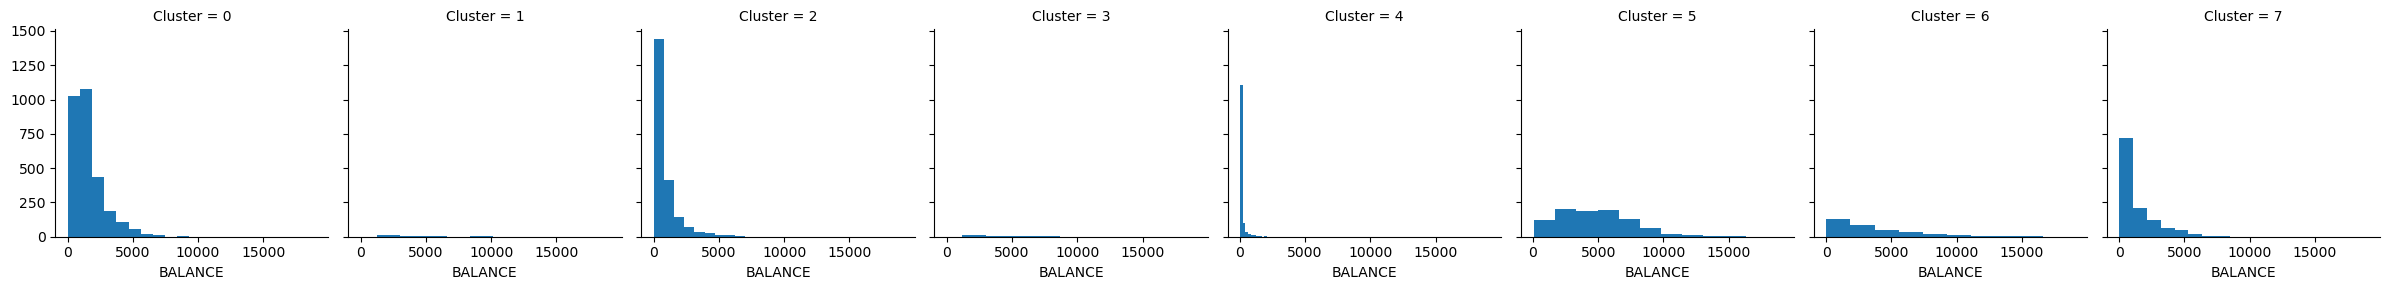

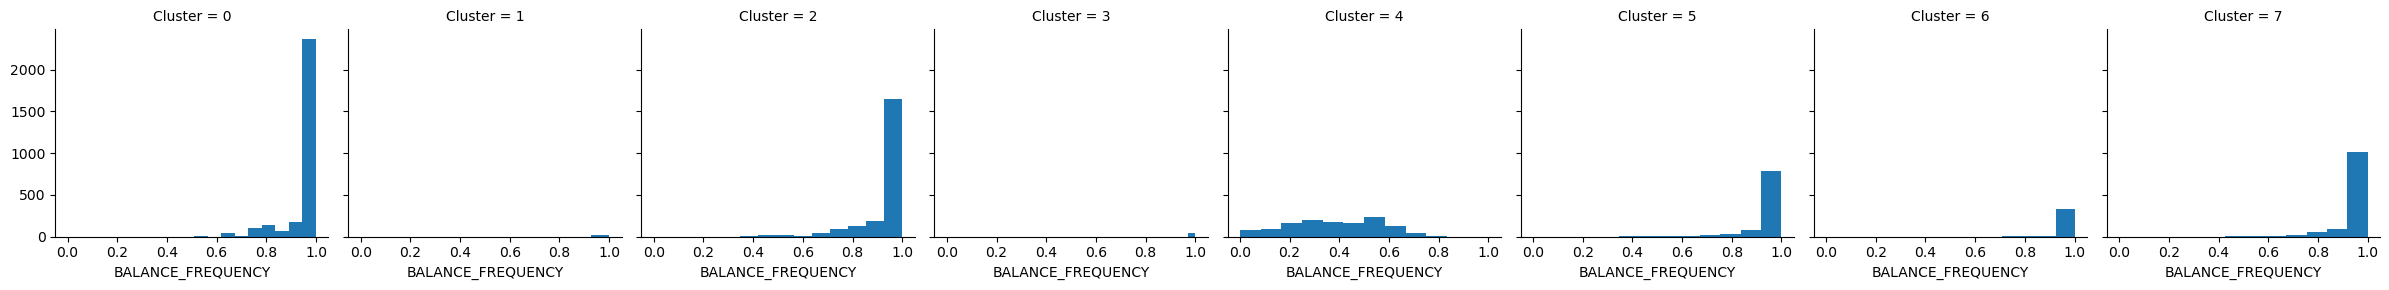

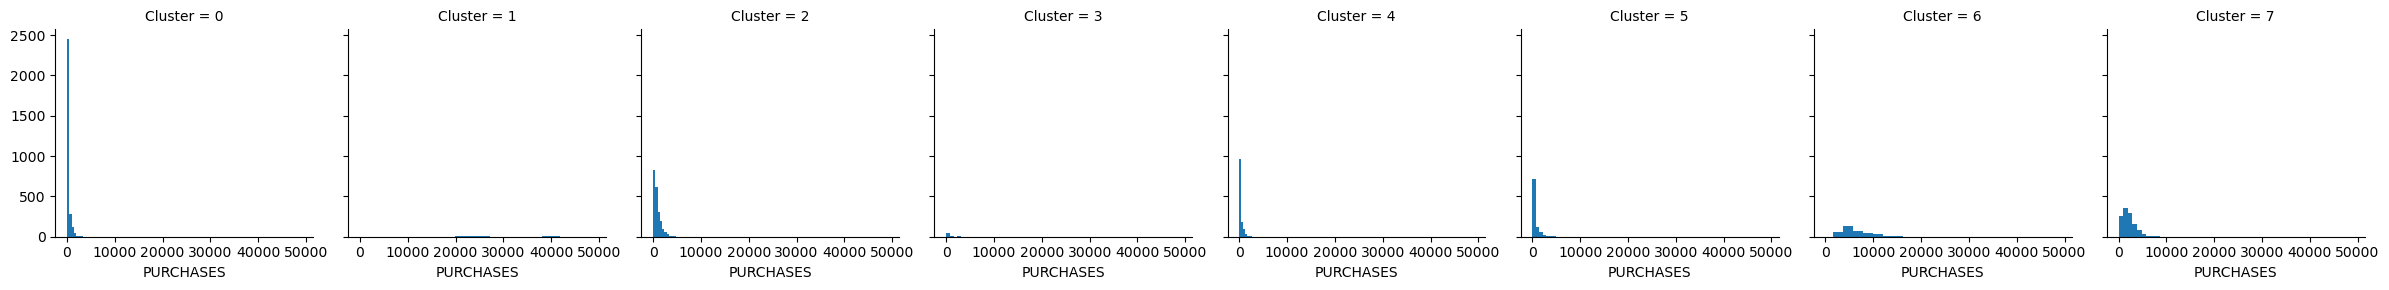

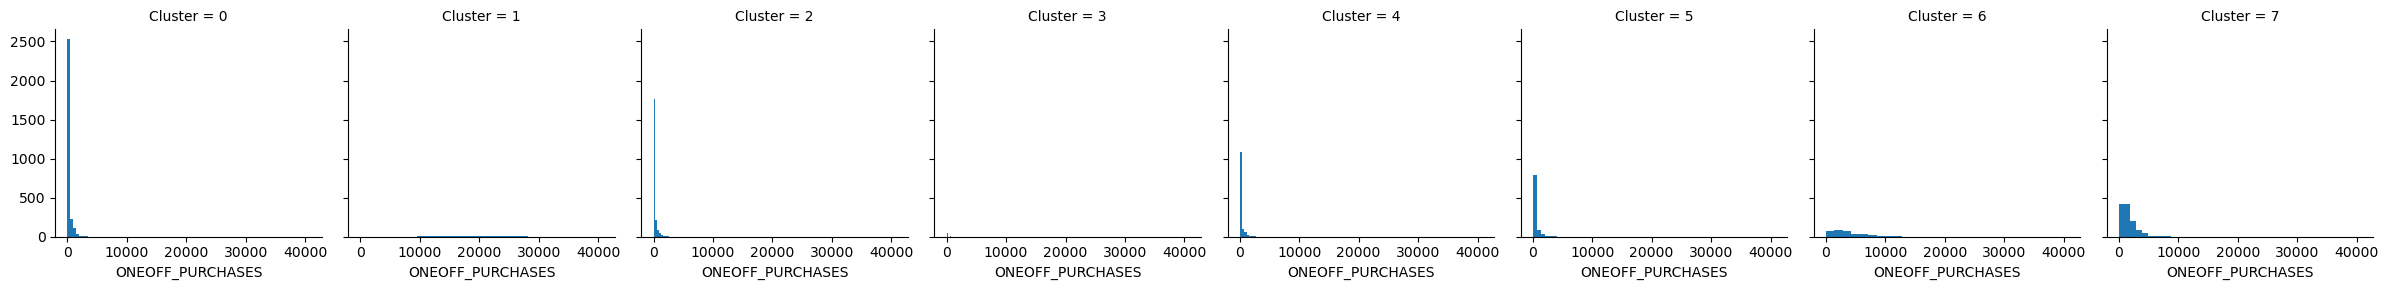

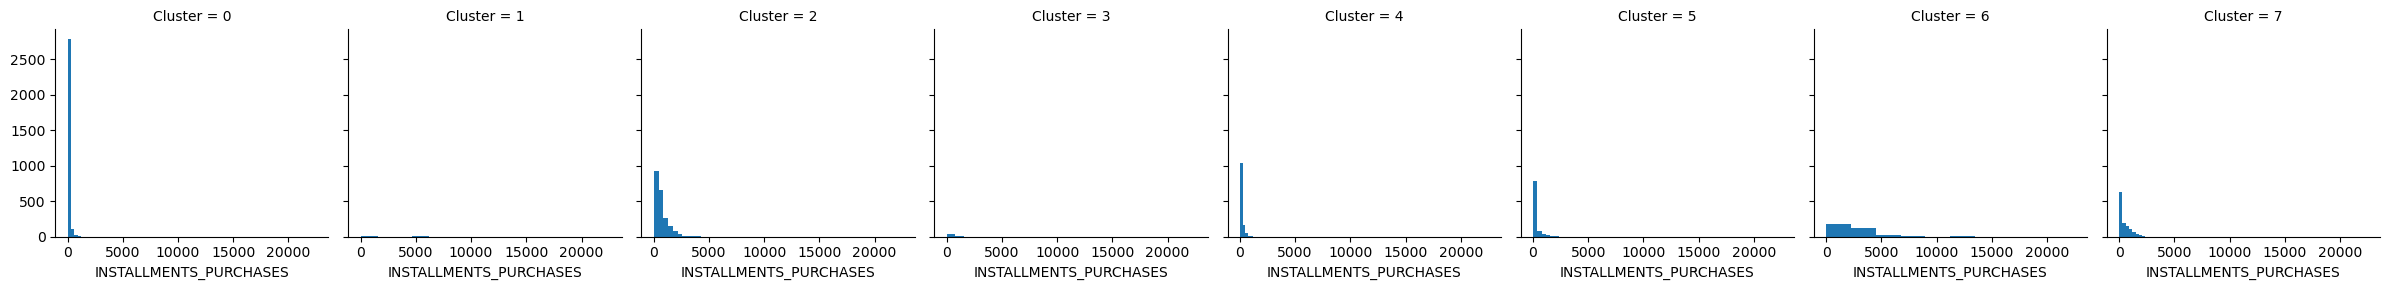

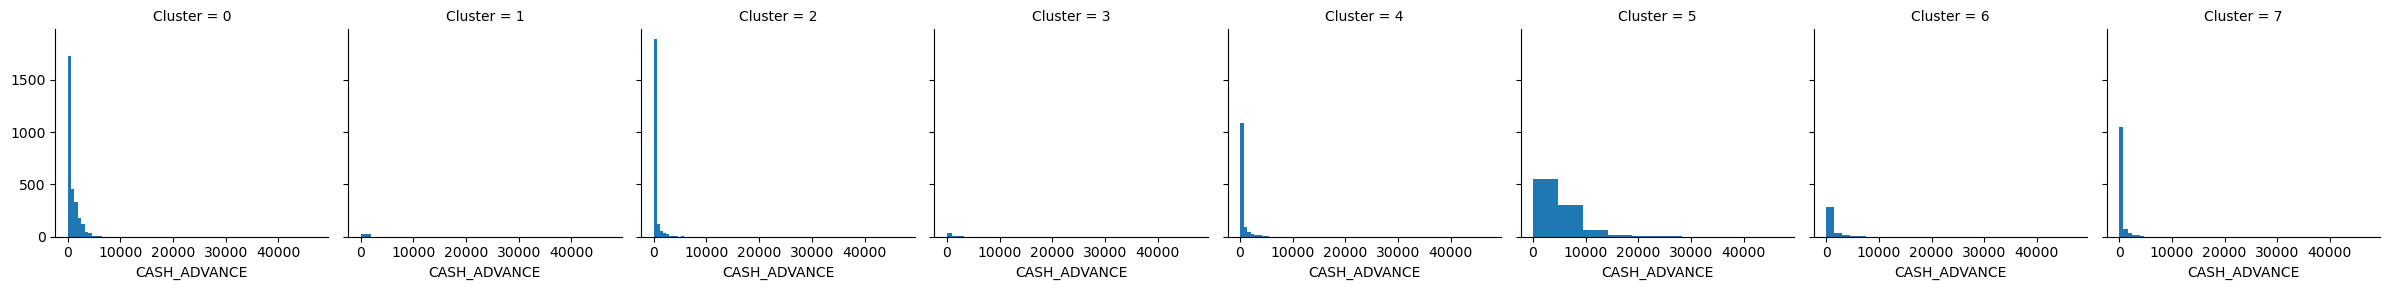

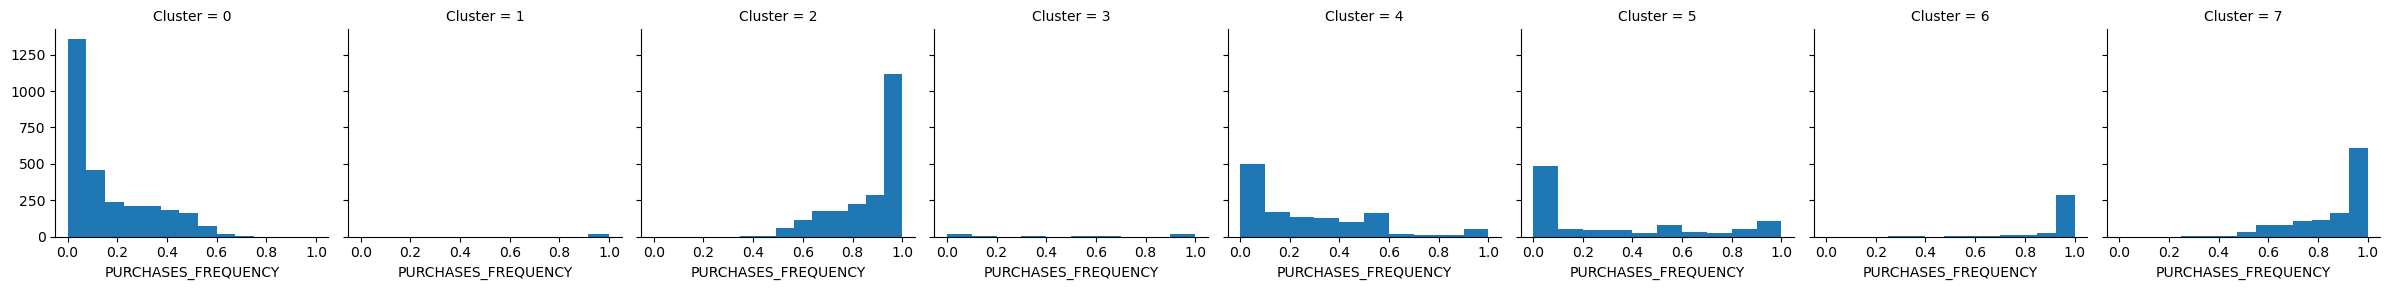

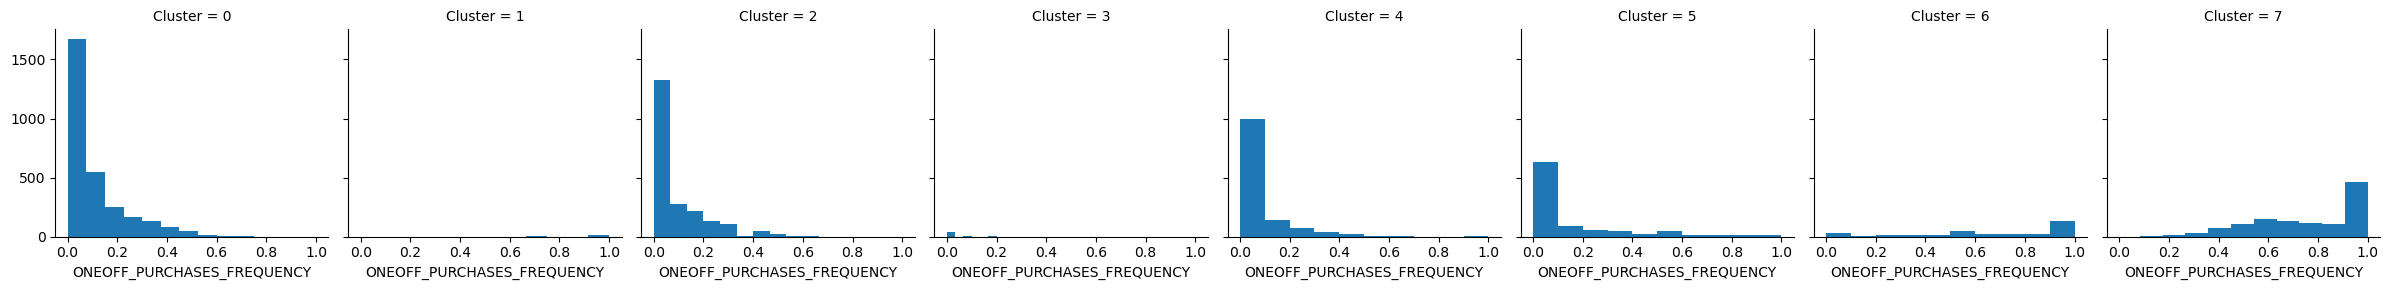

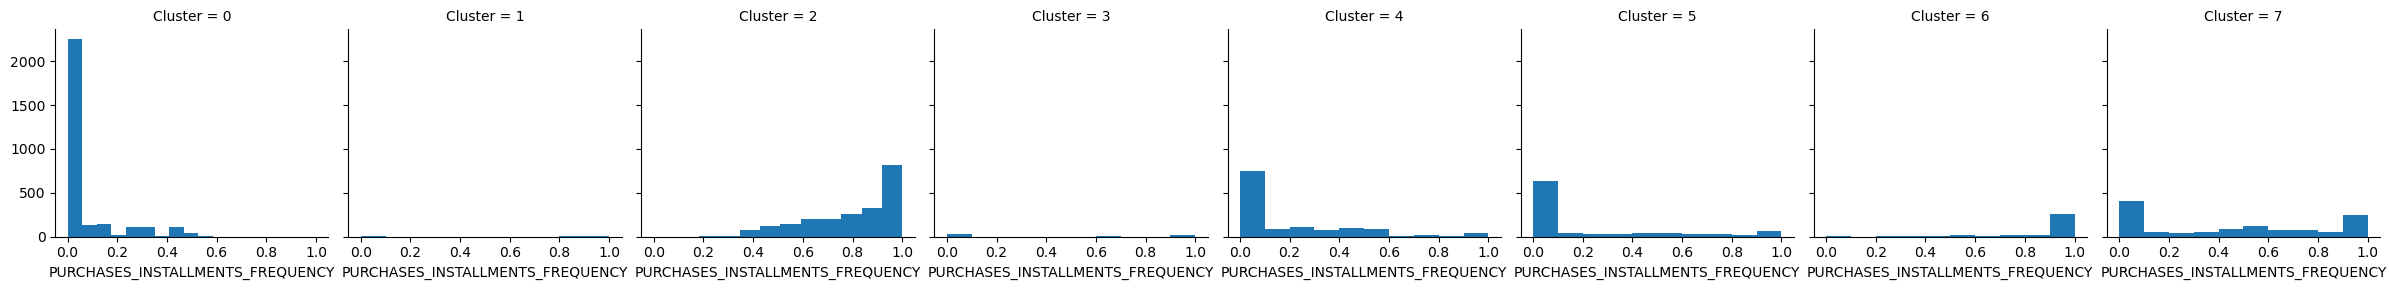

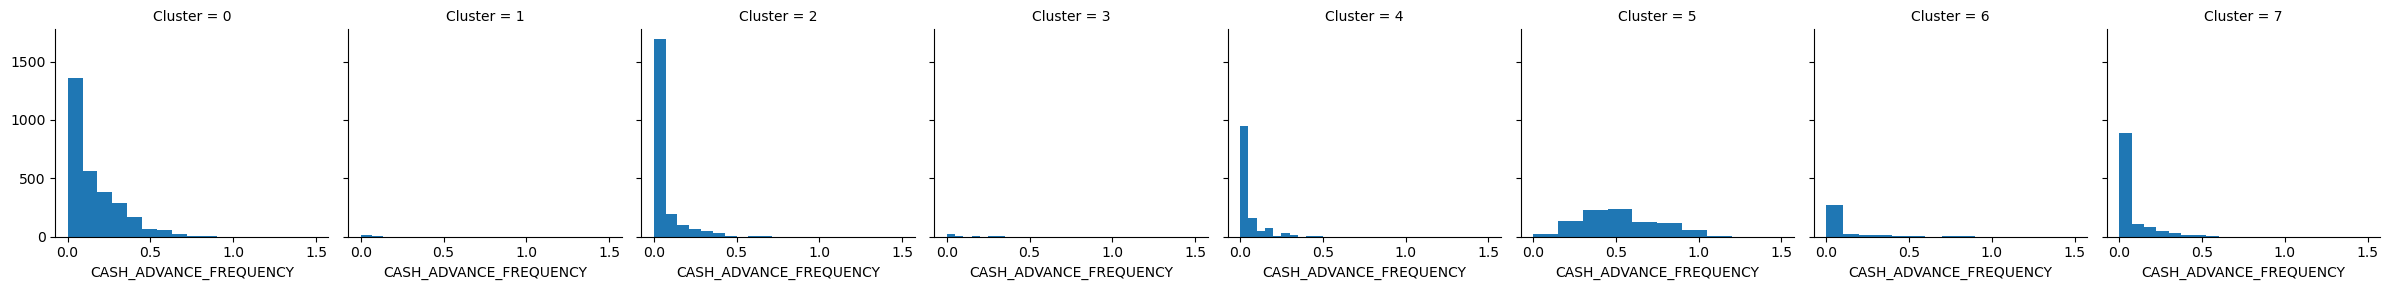

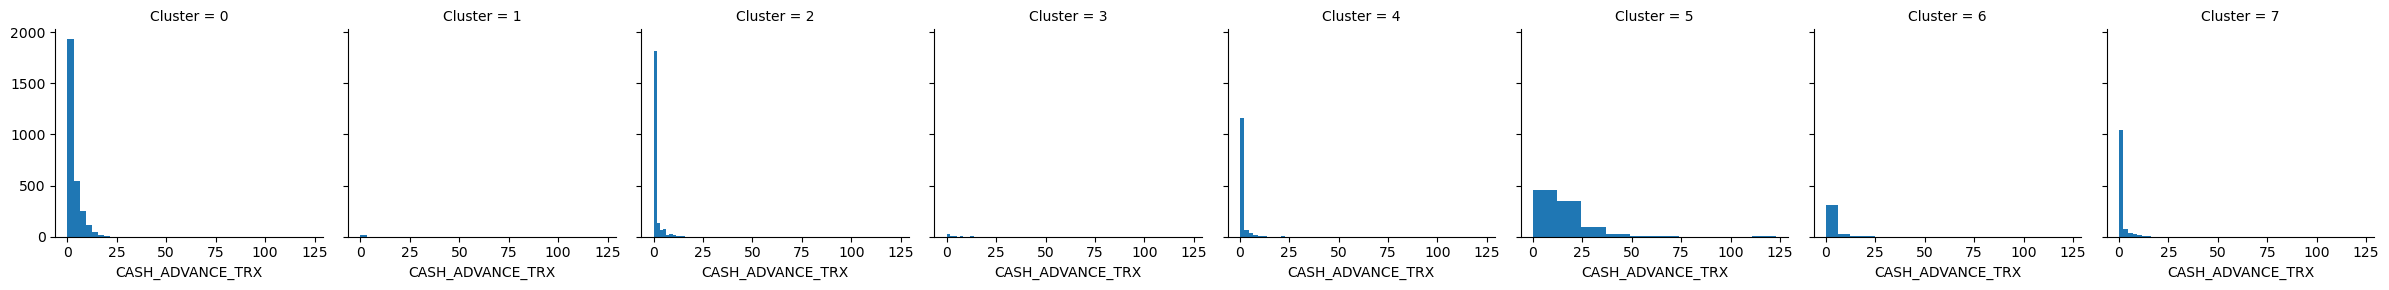

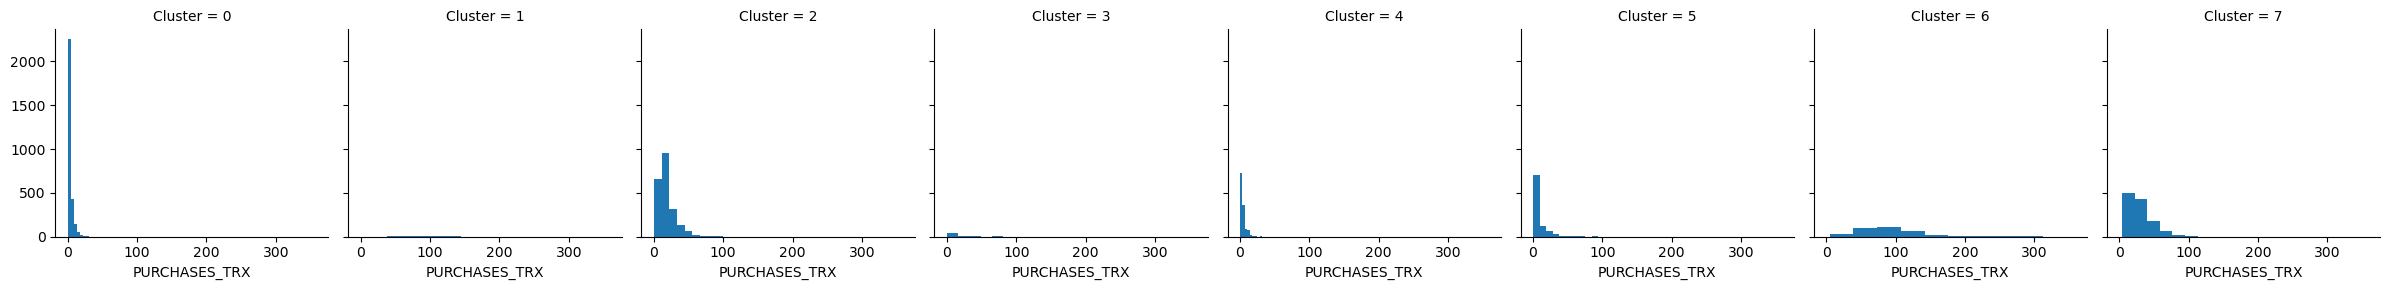

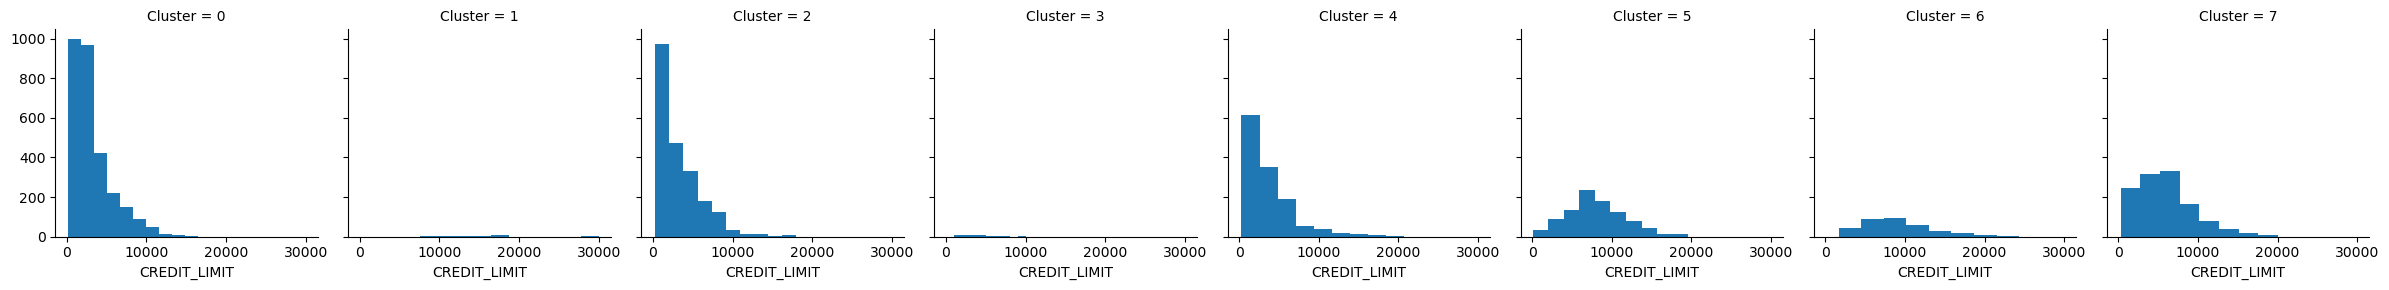

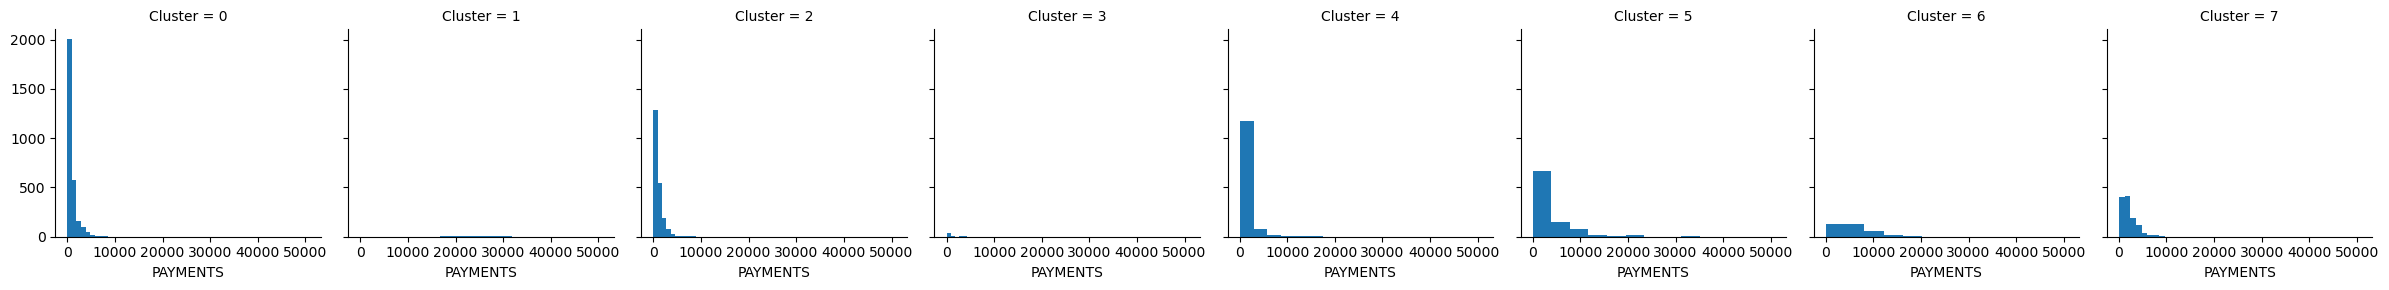

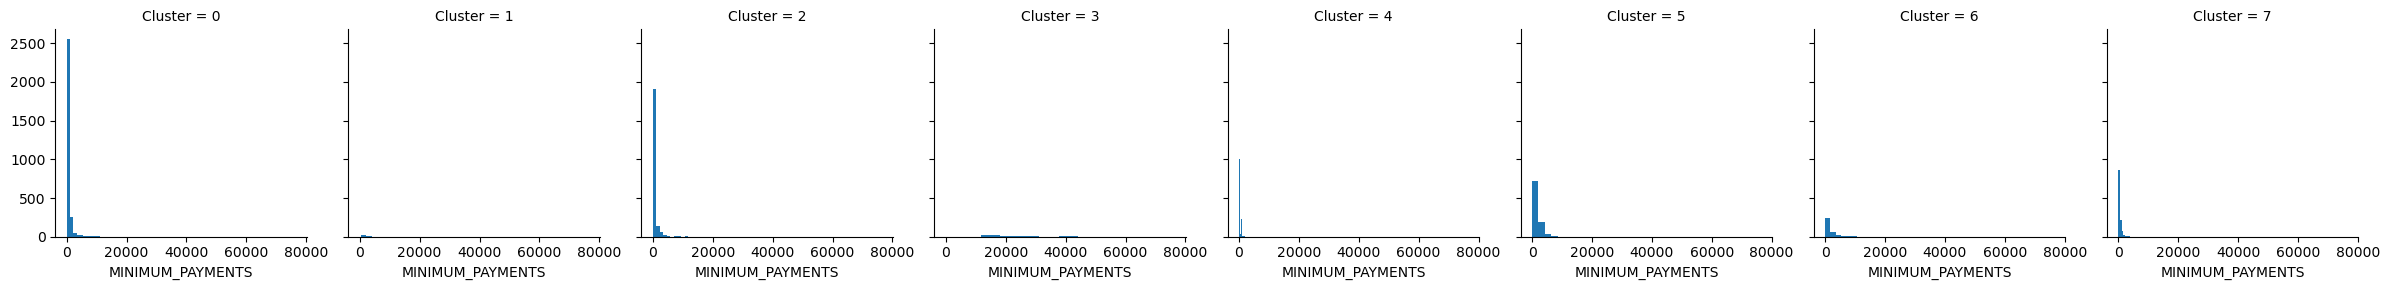

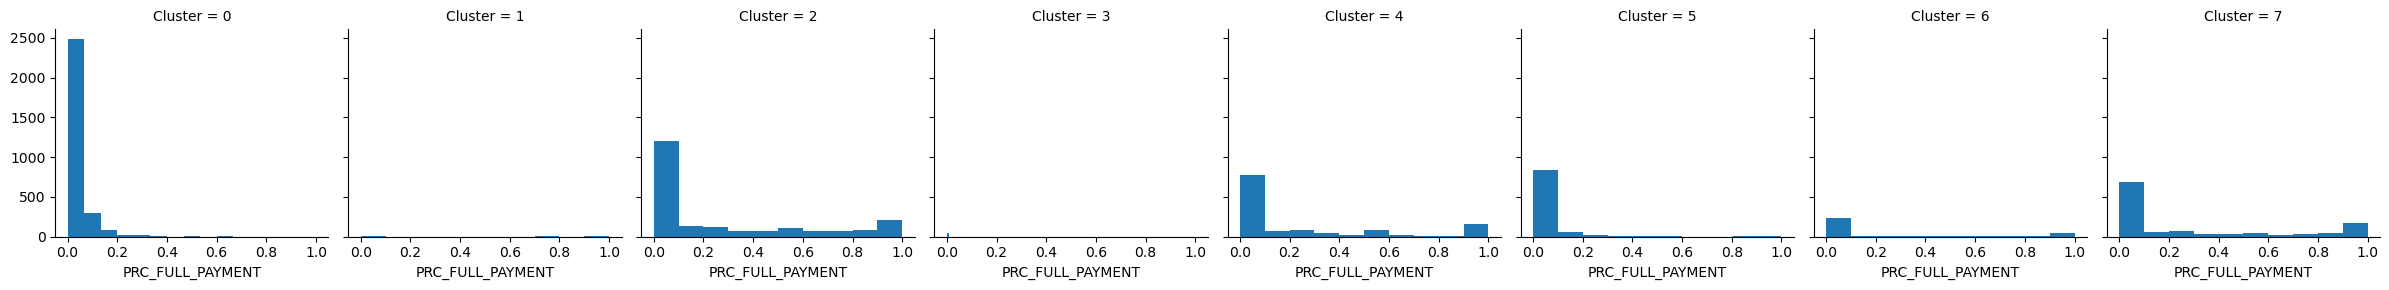

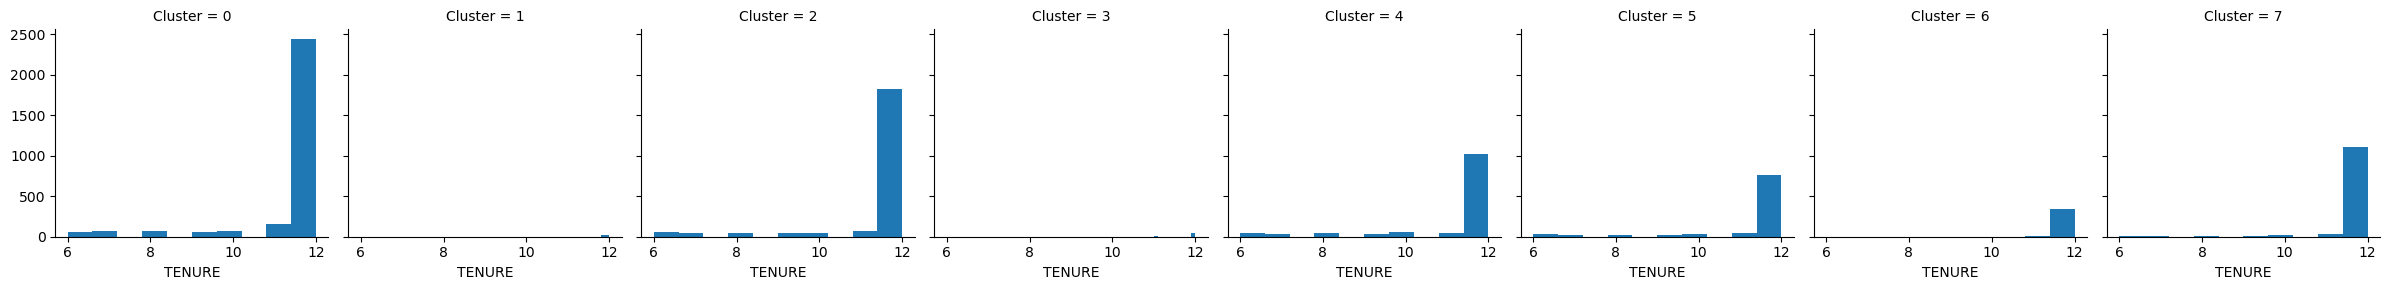

In [66]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [69]:
cluster_df.to_csv('customer_clustered_data.csv')

### Predictive Model Building

In [70]:
X = cluster_df.drop('Cluster',axis = 1)

In [71]:
y = cluster_df['Cluster']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
tree_model = DecisionTreeClassifier()

In [77]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
preds = tree_model.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [80]:
accuracy_score(y_test,preds)

0.9087523277467412

In [81]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       906
           1       1.00      0.80      0.89         5
           2       0.93      0.92      0.93       639
           3       1.00      0.92      0.96        13
           4       0.94      0.95      0.95       383
           5       0.82      0.81      0.82       268
           6       0.79      0.79      0.79       107
           7       0.88      0.87      0.88       364

    accuracy                           0.91      2685
   macro avg       0.91      0.88      0.89      2685
weighted avg       0.91      0.91      0.91      2685



In [82]:
confusion_matrix(y_test,preds)

array([[849,   0,  13,   0,   8,  24,   1,  11],
       [  0,   4,   0,   0,   1,   0,   0,   0],
       [ 10,   0, 589,   0,  10,  13,   5,  12],
       [  1,   0,   0,  12,   0,   0,   0,   0],
       [  5,   0,   7,   0, 365,   4,   0,   2],
       [ 32,   0,   5,   0,   1, 218,   4,   8],
       [  3,   0,   6,   0,   1,   2,  85,  10],
       [ 12,   0,  13,   0,   3,   5,  13, 318]], dtype=int64)

In [105]:
tree_model.feature_importances_

array([0.03908742, 0.21578995, 0.0514314 , 0.0127371 , 0.0132761 ,
       0.09801571, 0.22780008, 0.15524579, 0.01706842, 0.01152418,
       0.06632358, 0.02137831, 0.02251059, 0.01454367, 0.02495692,
       0.00573741, 0.00257339])

In [108]:
feat = pd.DataFrame(index = X.columns,data = tree_model.feature_importances_,columns = ['Importance'])

In [109]:
feat

Importance
BALANCE                             0.039087
BALANCE_FREQUENCY                   0.215790
PURCHASES                           0.051431
ONEOFF_PURCHASES                    0.012737
INSTALLMENTS_PURCHASES              0.013276
CASH_ADVANCE                        0.098016
PURCHASES_FREQUENCY                 0.227800
ONEOFF_PURCHASES_FREQUENCY          0.155246
PURCHASES_INSTALLMENTS_FREQUENCY    0.017068
CASH_ADVANCE_FREQUENCY              0.011524
CASH_ADVANCE_TRX                    0.066324
PURCHASES_TRX                       0.021378
CREDIT_LIMIT                        0.022511
PAYMENTS                            0.014544
MINIMUM_PAYMENTS                    0.024957
PRC_FULL_PAYMENT                    0.005737
TENURE                              0.002573

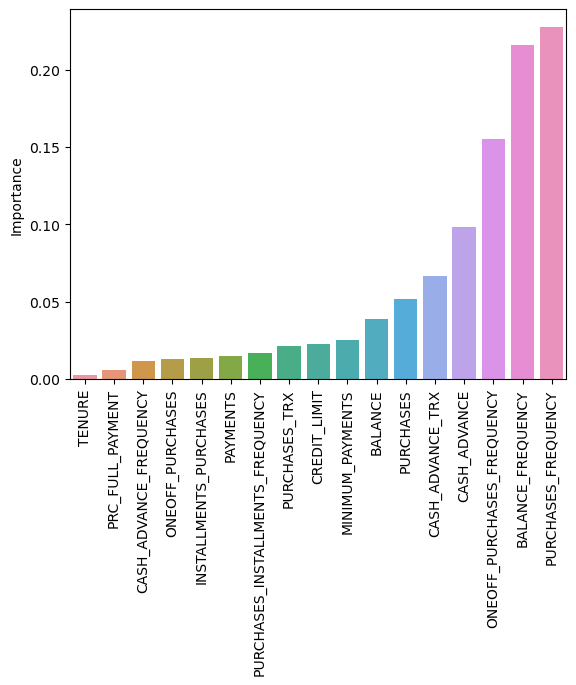

In [114]:
sns.barplot(data = feat.sort_values('Importance'),x = feat.sort_values('Importance').index,y='Importance')
plt.xticks(rotation = 90);

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
len(X.columns)

17

In [89]:
error = []

for n in range(1,18):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    err = 1-accuracy_score(y_test,pre)
    
    error.append(err)

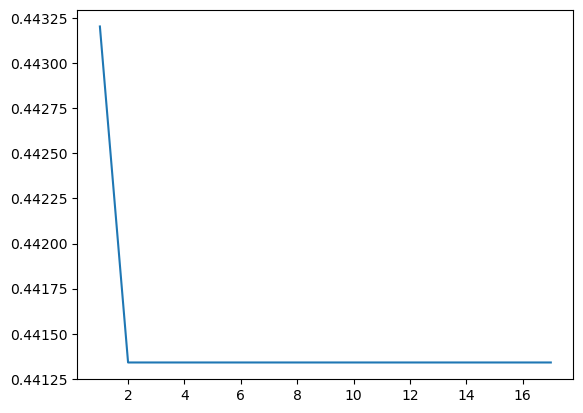

In [90]:
plt.plot(range(1,18),error)

In [91]:
ada_model= AdaBoostClassifier(n_estimators=2)

In [92]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=2)

In [93]:
pred = ada_model.predict(X_test)

In [94]:
accuracy_score(y_test,pred)

0.5586592178770949

In [95]:
ada_model.feature_importances_

array([0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. ])

In [96]:
feat = pd.DataFrame(index = X.columns,data = ada_model.feature_importances_,columns = ['Importance'])

In [97]:
feat

Importance
BALANCE                                  0.0
BALANCE_FREQUENCY                        0.0
PURCHASES                                0.5
ONEOFF_PURCHASES                         0.0
INSTALLMENTS_PURCHASES                   0.0
CASH_ADVANCE                             0.0
PURCHASES_FREQUENCY                      0.5
ONEOFF_PURCHASES_FREQUENCY               0.0
PURCHASES_INSTALLMENTS_FREQUENCY         0.0
CASH_ADVANCE_FREQUENCY                   0.0
CASH_ADVANCE_TRX                         0.0
PURCHASES_TRX                            0.0
CREDIT_LIMIT                             0.0
PAYMENTS                                 0.0
MINIMUM_PAYMENTS                         0.0
PRC_FULL_PAYMENT                         0.0
TENURE                                   0.0

**Best model is Decision Tree hence save the model**